- Name : Selim Ozdogan
- Student Id : 300340479

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.linear_model import Ridge, Lasso 
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 


### Html Styles

In [2]:
%%html
<style>
table {margin-left: 0 !important;}
h1, h2, h3, h4 {margin: 0 !important; text-decoration: underline !important}
</style>

### Retreving data

In [3]:
df = pd.read_csv(r'.\Dataset\cleanedCensusData.csv')

### Feature Engineering
- The data has enough features and all features are numeric
- I don't need to extend or to transform the features
- However, I need to apply features Selection
- I will use GridSearch for tuning

#### I will use scalling, feature elemination and reggesstion models
- Scalling
    - StandardScaler
    - RobustScaler
- Feature Elemination
    - PCA
    - Lasso (It is a regressor but, it also has own features selection)
- Reggestion
    - LinearRegression
    - DecisionTreeRegressor
    - GradientBoostingRegressor
    - RandomForestRegressor
    - AdaBoostRegressor
    - XGBRegressor
    - Rigge
    - Lasso

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Columns: 2244 entries, 1 to GovernmentTransfers
dtypes: float64(2244)
memory usage: 123.2 MB


# Model

#### Store Model

In [5]:
models=[]
names=[]

#### Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
lrmodel = LinearRegression()
models.append(lrmodel)
names.append(lrmodel.__class__.__name__)

#### Decision Tree Regressor

In [7]:
from sklearn.tree import DecisionTreeRegressor
trmodel = DecisionTreeRegressor(max_depth=3)
models.append(trmodel)
names.append(trmodel.__class__.__name__)

#### Gradient Boosting Regressor

In [8]:
from sklearn.ensemble import GradientBoostingRegressor
grmodel = GradientBoostingRegressor()
models.append(grmodel)
names.append(grmodel.__class__.__name__)

#### Random Forest Regressor

In [9]:
from sklearn.ensemble import RandomForestRegressor
frmodel = RandomForestRegressor(n_estimators=100)
models.append(frmodel)
names.append(frmodel.__class__.__name__)

#### Ada Boost Regressor

In [10]:
from sklearn.ensemble import AdaBoostRegressor
armodel = AdaBoostRegressor()
models.append(armodel)
names.append(armodel.__class__.__name__)

#### XGB Regressor

In [11]:
from xgboost import XGBRegressor
xrmodel = XGBRegressor(n_estimators=100)
models.append(xrmodel)
names.append(xrmodel.__class__.__name__)

#### Lasso Regressor

In [12]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 1, normalize = False, max_iter=1000)
models.append(lasso)
names.append(lasso.__class__.__name__)

#### Ridge Regressor

In [13]:
from sklearn.linear_model import Ridge 
ridge = Ridge(alpha = 1, normalize = False, max_iter=1000)
models.append(ridge)
names.append(ridge.__class__.__name__)

### Split Data

In [14]:
X = df.drop('GovernmentTransfers', axis=1)
y = df.GovernmentTransfers

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### PipeLine For Regressors
- In this part
    - I will use 3 Scalling
        - RobustScaler
        - StandardScaler
        - MinMaxScaler
    - and 8 Regressors
        - LinearRegression
        - DecisionTreeRegressor
        - GradientBoostingRegressor
        - RandomForestRegressor
        - AdaBoostRegressor
        - XGBRegressor
        - Lasso
        - Ridge	

In [15]:
from sklearn.pipeline import Pipeline

modelnames=[]
scalernames=[]
r2=[]
rmse=[]

for scaler in [RobustScaler(), StandardScaler(), MinMaxScaler()]:
    for model in models: 
        pipe = Pipeline([('scaler',scaler),('regressor', model)])
        pipe.fit(X_train, y_train)
        pred = pipe.predict(X_test)
        modelnames.append(model.__class__.__name__)
        scalernames.append(scaler.__class__.__name__)
        r2.append(pipe.score(X_test, y_test))
        rmse.append(mean_squared_error(y_test, pred)**0.5)


result_df = pd.DataFrame(zip(scalernames, modelnames , r2, rmse), columns=['Scaler', 'Regressor', 'R^2 score', 'RMSE'])
pd.set_option('display.float_format', lambda x: '%.3f' % x)
result_df

,Scaler,Regressor,R^2 score,RMSE
0,RobustScaler,LinearRegression,0.961,293920.175
1,RobustScaler,DecisionTreeRegressor,0.743,750272.276
2,RobustScaler,GradientBoostingRegressor,0.950,331782.744
3,RobustScaler,RandomForestRegressor,0.944,349999.939
4,RobustScaler,AdaBoostRegressor,0.883,506424.547
5,RobustScaler,XGBRegressor,0.940,363439.972
6,RobustScaler,Lasso,0.954,316371.552
7,RobustScaler,Ridge,0.964,282751.242
8,StandardScaler,LinearRegression,0.960,294325.339
9,StandardScaler,DecisionTreeRegressor,0.743,750272.276


**According to table**
- RobustScaler Scaller and Ridge Regression give the best score.
- However, StandardScaler is recomended by https://scikit-learn.org/
- R^2 = 0.965
- RMSE = 282793.402

### Clustering

I would like to check also clustering with Ridge

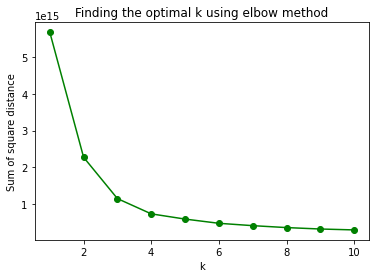

3

In [16]:
from sklearn.cluster import KMeans

kmax = 10
wcss = []
for n in range(1, kmax+1):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(X = X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,kmax+1), wcss, '-go')
plt.xlabel('k')
plt.ylabel('Sum of square distance')
plt.title('Finding the optimal k using elbow method')
plt.show()

from kneed import KneeLocator
kl = KneeLocator(range(1,kmax+1), wcss, curve='convex', direction='decreasing')
kl.elbow

**cluster should be 3 according elbow method**

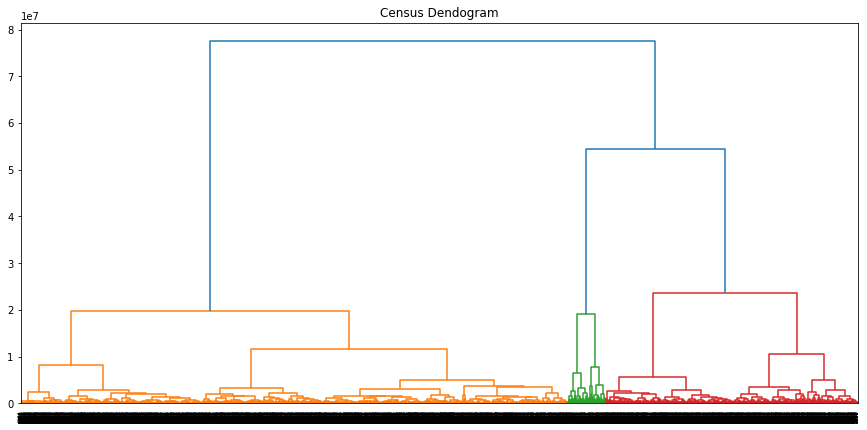

In [17]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

def show_dendogram(data):
    plt.figure(figsize=(15, 7))
    plt.title("Census Dendogram")
    dend = shc.dendrogram(shc.linkage(data, method='ward'))
show_dendogram(X)

**cluster should be 3 as showing grafic**

### Pipeline for Clustering
- In this part
    - I will use K-Means and Birch Clustering
    - I will use StandardScaler scalling as a preprocessing
    - I will use Ridge
    - also I will check Ridge's normalize feature

In [18]:
import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA 
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import Birch


max_iter = 1000       
best_score = 0
alpha = 0.36

#this is for Ridge's normalize method
for normalize in [True, False]:
    clusters = {1: KMeans(n_clusters=3, init="k-means++", max_iter=max_iter),  2: Birch(n_clusters= 3)}
    for cl in [1,2]:
        for solver in ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']:
            regression = Pipeline(
            [
                ('cluster', clusters[cl]),
                ('Ridge',Ridge(max_iter= max_iter,
                             normalize = not normalize,
                             alpha = alpha,
                             solver =solver,
                             random_state = 42 ))
            ])
            if normalize:
                preprocessing = Pipeline(
                [
                    ("scaler", StandardScaler()),
                    ("pca", PCA(n_components= 0.9))

                ]
                )
                pipe = Pipeline(
                [
                    ("preprocessing", preprocessing),("regression", regression)
                ]
                )
            else:
                preprocessing = Pipeline(
                [
                    ("pca", PCA(n_components= 0.9))
                ]
                )
                pipe = Pipeline(
                [
                    ("preprocessing", preprocessing),("regression", regression)
                ]
                )
            
            pipe.fit(X_train, y_train)
            score = pipe.score(X_test, y_test)

            parameters = {'norm': ('Ridge' if not normalize else 'Stand'),
                          'cluster': ('No Clu' if cl == 0 else 'K-Mean' if cl == 1 else 'Birch '),
                          'solver': solver,
                          'alpha':"{:.2f}".format(alpha),
                          'max_iter':max_iter}
            if score > best_score:
                best_score = score
                best_parameters = parameters
                print("So Far Best score : {:.2f}".format(best_score))        

print("Best score: {:.2f}".format(best_score))        
print("Best parameters: {}".format(best_parameters))

So Far Best score : 0.37
So Far Best score : 0.37
So Far Best score : 0.93
So Far Best score : 0.93
Best score: 0.93
Best parameters: {'norm': 'Stand', 'cluster': 'Birch ', 'solver': 'svd', 'alpha': '0.36', 'max_iter': 1000}


Best score: 0.94
Best parameters: {'norm': 'Stand', 'cluster': 'Birch ', 'solver': 'auto', 'alpha': '0.36', 'max_iter': 1000}

### Tunning
- I will try max_iter 10K to 100K with 10 different max_iter
- And for alpha 0.001 to 1 by 1K with 50 different alpha
- Cluster will be 3
- n_componenent will be 0.9

In [19]:
from sklearn.neural_network import MLPRegressor

best_score = 0
n_clusters = 3
n_components = 0.9 

for max_iter in np.linspace(1000,100000,10):
    for alpha in 10**np.linspace(-3, 3, 50):
        preprocessing = Pipeline(
        [
            ("scaler", StandardScaler()),
            ("pca", PCA(n_components=n_components))
        ]
        )
        regression = Pipeline(
        [
            ('cluster', Birch(n_clusters= n_clusters)),
            ('Ridge',Ridge(max_iter= max_iter,
                         normalize = False,
                         alpha = alpha,
                         random_state = 42 )),
        ])
        pipe = Pipeline(
        [
            ("preprocessing", preprocessing),("regression", regression)
        ]
        )

        pipe.fit(X_train, y_train)
        score = pipe.score(X_test, y_test)

        parameters = {'alpha':"{:.2f}".format(alpha),
                        'max_iter':max_iter}
        if score > best_score:
            best_score = score
            best_parameters = parameters
            print("So Far Best score : {:.2f}".format(best_score))        
            
print("Best score: {:.2f}".format(best_score))        
print("Best parameters: {}".format(best_parameters))

So Far Best score : 0.93
So Far Best score : 0.93
So Far Best score : 0.93
So Far Best score : 0.93
So Far Best score : 0.93
So Far Best score : 0.93
So Far Best score : 0.93
So Far Best score : 0.93
So Far Best score : 0.93
So Far Best score : 0.93
So Far Best score : 0.93
So Far Best score : 0.93
So Far Best score : 0.93
So Far Best score : 0.93
So Far Best score : 0.93
So Far Best score : 0.93
So Far Best score : 0.93
So Far Best score : 0.93
So Far Best score : 0.93
So Far Best score : 0.93
So Far Best score : 0.93
Best score: 0.93
Best parameters: {'alpha': '184.21', 'max_iter': 1000.0}


Best score: 0.94
Best parameters: {'alpha': '59.64', 'max_iter': 1000.0}

### Evaluation

In [20]:
n_clusters = 3
n_components = 0.9
alpha = 59.64
max_iter = 100000

preprocessing = Pipeline(
[
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=n_components))
]
)
regression = Pipeline(
[
    ('cluster', Birch(n_clusters= n_clusters)),
    ('Ridge',Ridge(max_iter= max_iter,
                 normalize = False,
                 alpha = alpha,
                 random_state = 42 )),
])
pipe = Pipeline(
[
    ("preprocessing", preprocessing),("regression", regression)
]
)

pipe.fit(X_train, y_train)
score = pipe.score(X_test, y_test)
pred = pipe.predict(X_test)

rmse = mean_squared_error(y_test, pred)**0.5    

print("R2: {:.2f}".format(score))    
print("RMSE: {:.2f}".format(rmse))    

R2: 0.93
RMSE: 378735.45


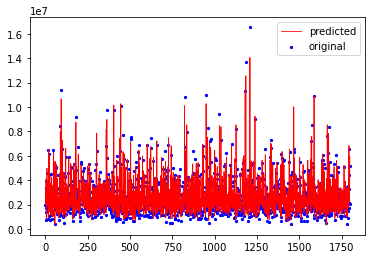

In [21]:
x_ax = range(len(pred))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

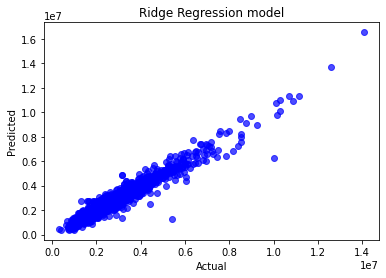

In [22]:
# plot the prediction vs actual
actual = y_test
plt.scatter(pred, actual, color='b', alpha=.7)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Ridge Regression model')
plt.show()

### Observations
- According to graphs and R2, the model is accurate on the test data
- Even if the data has some outliners, the model work properly
- I will try the model with out-of-sample data

### Out of Sample Test
I will create out of sample data with mean of the columns

In [23]:
df_OFS = pd.DataFrame(np.array([df.mean(axis=0)]), columns=df.columns)
X_OFS = df_OFS.drop('GovernmentTransfers', axis=1)
y_OFS = df_OFS.GovernmentTransfers

In [24]:
pred_OFS = pipe.predict(X_OFS)

print("Pred: {:.2f}".format(pred_OFS[0]))    
print("Actual: {:.2f}".format(y_OFS[0]))  
    

Pred: 2701220.41
Actual: 2708873.18


### Observation
- Predition and Actual value pretty similar for the Out of Sample data
- **Pred:** CAD 2699568.55
- **Actual:** CAD 2708873.18